# RMSE Plots Comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the different CSVs as DataFrames
Specify the paths to the CSVs

In [4]:
# sr_Sinit0p95_anytime_runs.csv

#### Organizing the mess of file names

Offline lambda return agents
- `offline_lambda_return_runs.csv`: lambda return sweeped learning rate in [0,1]
- `offline_lambda_smallLR_runs.csv`: lambda return sweeped learning rate in [0, ~0.333]
- `offline_lambda_smallLR_Vinit0_runs.csv`: value function initialized at 0 rather than 0.5, small LR range (0-~0.33)

SR agent
- `sr_Sinit0p95_anytime_runs.csv` SR agent with exponential sum covergence initiation, bounded at 0.95, mlutiplied by 5
- `sr_Sinit0p95_anyTP5`: SR agent, less sampling to learn SR (only 5%)

S-trace agents
- `sTrace_0srinit_runs.csv`: s-trace matrix initialized at 0
- `sTrace_1srinit_runs.csv`: s-trace matrix init at 1
- `sTrace_Sinit0_Vinit0_runs.csv`: s-trace init at 0, value fn init at 0
- `sTrace_SlrHigh_Sinit0_Vinit0_runs.csv`: s-trace initi at 0, value fn init at 0, s-trace learning rate is double the value learning rate
- `sTrace_SlrHalf_Sinit0_Vinit0_runs.csv`: s-trace init at 0, value fn init at 0, s-trace learning rate is half of the value learning rate
- `sTrace_Slr1_Sinit0_Vinit0_runs.csv`: s-trace init at 0, value fn init at 0, s-trace learning rate is fixed at 1
- `sTrace_SinitP5_Vinit0p5_anytime_runs.csv`: s-trace init at exponential sum convergence * 0.5, value fn init at 0.5, same learning rate for s-trace and value fn, use anytime algorithm (sample 25% of traj)
- `sTrace_SinitP5_Vinit0p5bound95_anytime_runs.csv`: s-trace init at exponential sum convergence * 0.5, limited up to a exponentialted term of 0.95 (to prevent explosion), value fn init at 0.5, same learning rate for s-trace and value fn, use anytime algorithm (sample 25% of traj)
- `sTrace_Strue_Vinit0p5bound95_anytime_runs.csv`: solve the s-trace mat directly, value fn init at 0.5, same learning rate for s-trace and value fn, use anytime algorithm (sample 25% of traj)
- `strace_Sinit0p95_anyTP5`: s-terace init exp sum bounded by 0.95, with anytime sampling only 5%



sr_Sinit0p95_anytimeP5_runs.csv

strace_Sinit0p95_anyTP5

In [52]:
in_paths_dict = {
    'offline_lambda': '/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_return_runs.csv',
    'offline_lambda_small_lr': '/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_smallLR_runs.csv',
    'offline_lambda_Vinit0': '/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_smallLR_Vinit0_runs.csv',
    'sr_SinitBound0p95': '/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytime_runs.csv',
    'sr_Sinit0p95_anyTP5': '/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP5_runs.csv',
    'sr_Sinit0p95_anyTP10': '/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP10_runs.csv',
    'sr_Sinit0p95_anyTP15': '/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP15_runs.csv',
    'sr_Sinit0p95_anyTP5_gamma95': '/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP5_gamma95_runs.csv',
    'strace_0sinit': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_0srinit_runs.csv',
    'strace_1sinit': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_1srinit_runs.csv',
    'strace_Sinit0_Vinit0': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_Sinit0_Vinit0_runs.csv',
    'strace_SlrHigh_init0': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_SlrHigh_Sinit0_Vinit0_runs.csv',
    'strace_SlrHalf_init0': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_SlrHalf_Sinit0_Vinit0_runs.csv',
    'strace_Slr1_init0': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_Slr1_Sinit0_Vinit0_runs.csv',
    'strace_SinitP5_Vinit0p5_anyT': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_SinitP5_Vinit0p5_anytime_runs.csv',
    'strace_SinitP5_Vinit0P5bound95_anyT': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_SinitP5_Vinit0p5bound95_anytime_runs.csv', 
    'strace_Strue_Viit0P5bound95_anyT': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_Strue_Vinit0p5bound95_anytime_runs.csv',
    'strace_Sinit0p95_anyTP5': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_Sinit0p95_anytimeP5_runs.csv',
    'strace_anyTP5': '/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_anytimeP5_runs.csv'
}

In [53]:
df_dict = {}

for k in in_paths_dict:
    cur_path = in_paths_dict[k]
    df_dict[k] = pd.read_csv(cur_path)
    print(f'{len(df_dict[k])}\t{k}\t{cur_path}')

6000	offline_lambda	/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_return_runs.csv
6000	offline_lambda_small_lr	/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_smallLR_runs.csv
6000	offline_lambda_Vinit0	/Users/anthony/Playground/tensorboard_logs/09-30/offline_lambda_smallLR_Vinit0_runs.csv
6000	sr_SinitBound0p95	/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytime_runs.csv
6000	sr_Sinit0p95_anyTP5	/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP5_runs.csv
6000	sr_Sinit0p95_anyTP10	/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP10_runs.csv
6000	sr_Sinit0p95_anyTP15	/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP15_runs.csv
6000	sr_Sinit0p95_anyTP5_gamma95	/Users/anthony/Playground/tensorboard_logs/09-30/sr_Sinit0p95_anytimeP5_gamma95_runs.csv
6000	strace_0sinit	/Users/anthony/Playground/tensorboard_logs/09-30/sTrace_0srinit_runs.csv
6000	strace_1sinit	/Users/anthony/Pla

In [54]:
df_dict['offline_lambda'][0:3]

,Unnamed: 0,gamma,lr,lambda,seed,num_episodes,n_states,final_rmse
0,0,1.0,0.001,1.0,0,10,19,0.269796
1,1,1.0,0.001,1.0,2,10,19,0.264946
2,2,1.0,0.001,1.0,4,10,19,0.263184


### Get lowest RMSE for each algorithm

In [55]:
for k in df_dict:
    print(f'\n{k}')
    cur_df = df_dict[k]
    
    # Average over all but lr and lambda
    avg_cur_df = cur_df.groupby(['lambda', 'lr']).mean()
    avg_cur_df = avg_cur_df.reset_index()
    
    # Optional deletes
    del avg_cur_df['Unnamed: 0']
    del avg_cur_df['seed']
    del avg_cur_df['num_episodes']
    del avg_cur_df['n_states']
    
    # Find the minimum final RMSE
    min_rmse_idx = avg_cur_df['final_rmse'].idxmin()
    min_rmse_series = avg_cur_df.iloc[min_rmse_idx]
    
    print(min_rmse_series)
    


offline_lambda
lambda        0.900000
lr            0.100000
gamma         1.000000
final_rmse    0.122265
Name: 50, dtype: float64

offline_lambda_small_lr
lambda        0.800000
lr            0.166667
gamma         1.000000
final_rmse    0.117712
Name: 39, dtype: float64

offline_lambda_Vinit0
lambda        0.950000
lr            0.100000
gamma         1.000000
final_rmse    0.215933
Name: 67, dtype: float64

sr_SinitBound0p95
lambda        0.800000
lr            0.200000
gamma         1.000000
final_rmse    0.061765
Name: 36, dtype: float64

sr_Sinit0p95_anyTP5
lambda        0.000000
lr            0.010000
gamma         1.000000
final_rmse    0.307891
Name: 1, dtype: float64

sr_Sinit0p95_anyTP10
lambda        0.000000
lr            0.010000
gamma         1.000000
final_rmse    0.307858
Name: 1, dtype: float64

sr_Sinit0p95_anyTP15
lambda        0.000000
lr            0.010000
gamma         1.000000
final_rmse    0.307827
Name: 1, dtype: float64

sr_Sinit0p95_anyTP5_gamma95
lambda 

## Plot RMSE
Specify keys to plot

In [56]:
keys_2_plot = [k for k in df_dict]

keys_2_plot = ['offline_lambda_small_lr', 'strace_Strue_Viit0P5bound95_anyT', 
               'strace_anyTP5']

keys_2_plot

['offline_lambda_small_lr',
 'strace_Strue_Viit0P5bound95_anyT',
 'strace_anyTP5']

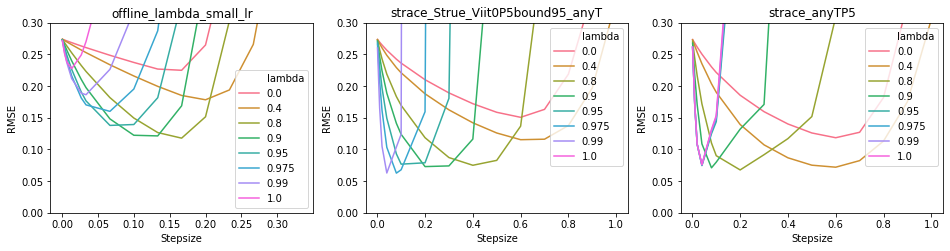

In [62]:
# ==
# Specify plots
plot_x = 'lr'
plot_y = 'final_rmse'
plot_hue = 'lambda'
plot_ci = None  # Estimator, [None, 'sd']



# ==
# Generate palette, assume all have same # hues
n_hues = len(set(df_dict[keys_2_plot[0]][plot_hue].values))
c_palette = sns.color_palette("husl", n_hues)

# ==
# Plot

plt.figure(figsize=(16, 3.5))

for i in range(len(keys_2_plot)):
    # Current data
    cur_df = df_dict[keys_2_plot[i]]
    
    # Plot
    plt.subplot(1, len(keys_2_plot), (i+1))
    sns.lineplot(x=plot_x, y=plot_y, hue=plot_hue, 
                 ci=plot_ci, 
                 palette = c_palette,
                 data=cur_df)
    
    plt.ylim([0, 0.3])
    plt.ylabel('RMSE')
    plt.xlabel('Stepsize')
    plt.title(keys_2_plot[i])


#### Rough notes on experimental conditions

The above are all ran on random chains with
- gamma = 1.0
- num_episodes = 10
- n_states = 19

The independently varying variables are:
- learning rate = `[0.001, 0.01, 0.02, 0.04, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`
- lambdas = `[1.0, 0.99, 0.975, 0.95, 0.9, 0.8, 0.4, 0.0]`
- seeds =  `[s * 2 for s in range(50)]`

For `offline_lambda_small_lr` we divided the `lr` range be 3 and re-did the sweep
